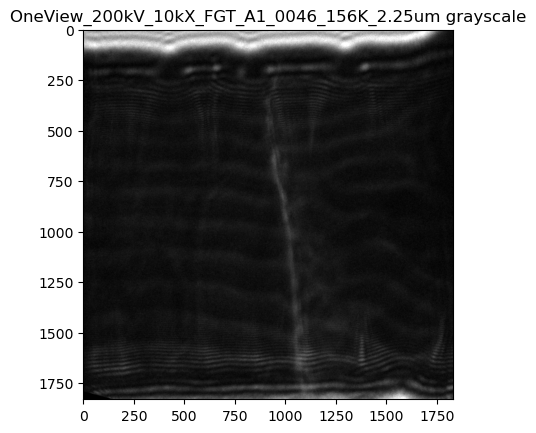

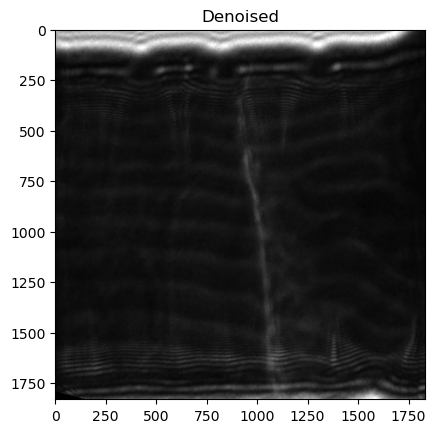

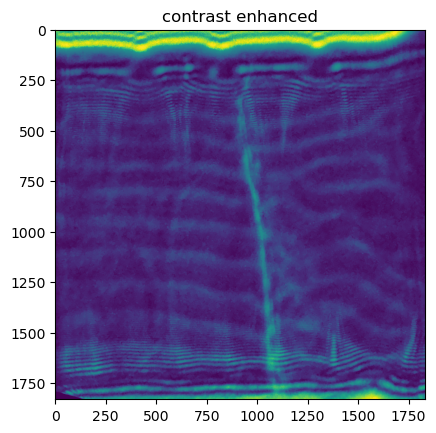

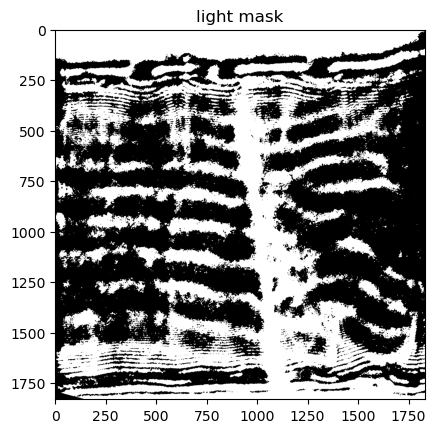

(1831, 1831)
light_pixels 1531925
total_pixels 3352561
dark_pixels 1820636
ratio 0.4569417230588795
OneView_200kV_10kX_FGT_A1_0046_156K_2.25um.png ratio of light pixels to total pixels:  0.4569417230588795


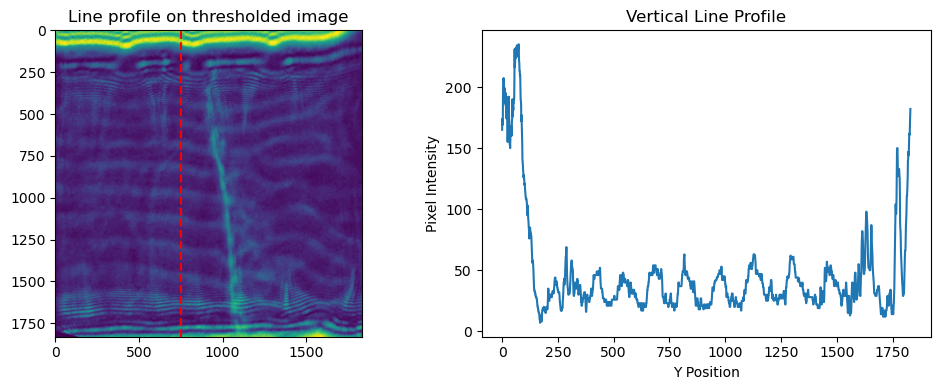

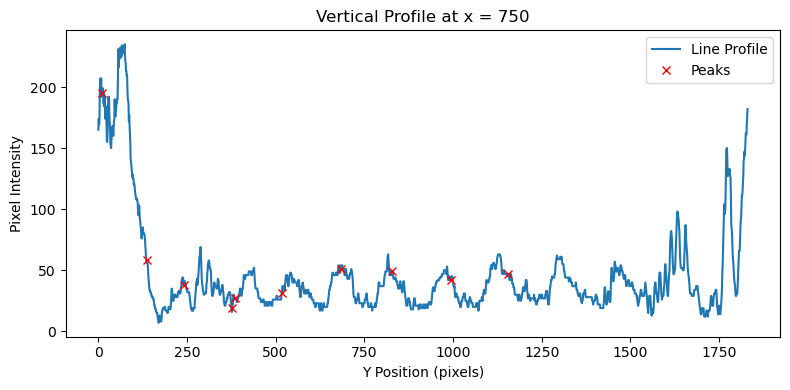

Number of peaks: 10
Average peak-to-peak spacing: 127.22 pixels


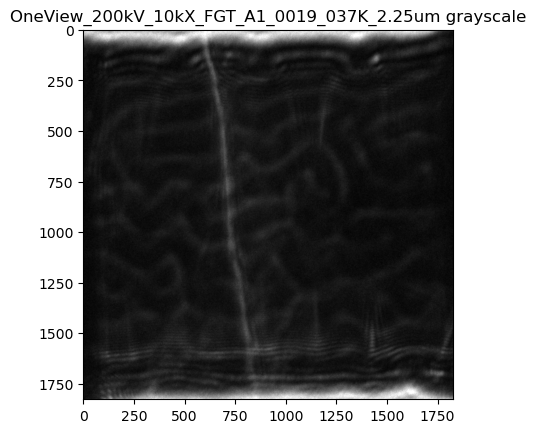

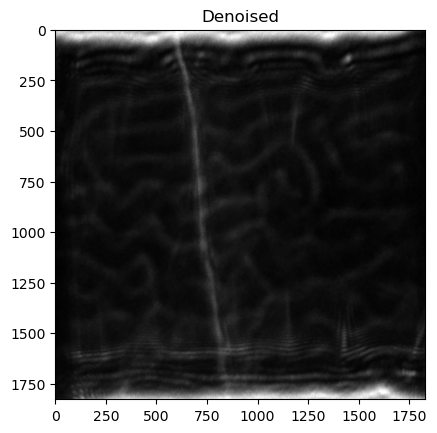

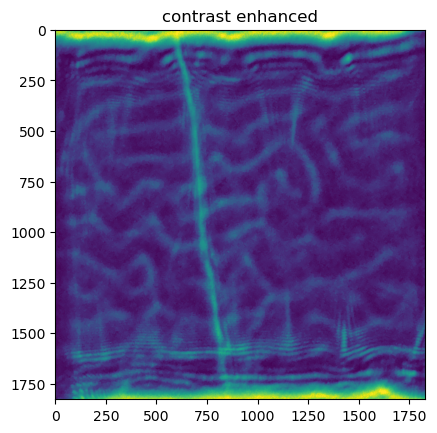

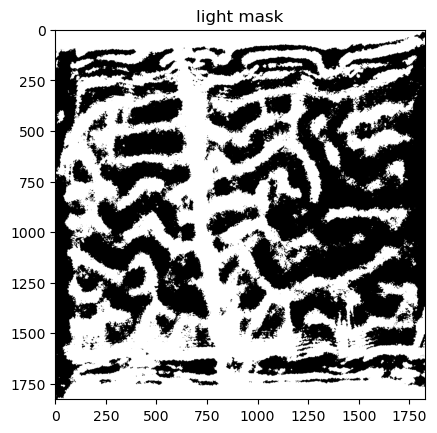

(1827, 1827)
light_pixels 1735302
total_pixels 3337929
dark_pixels 1602627
ratio 0.519873849923111
OneView_200kV_10kX_FGT_A1_0019_037K_2.25um.png ratio of light pixels to total pixels:  0.519873849923111


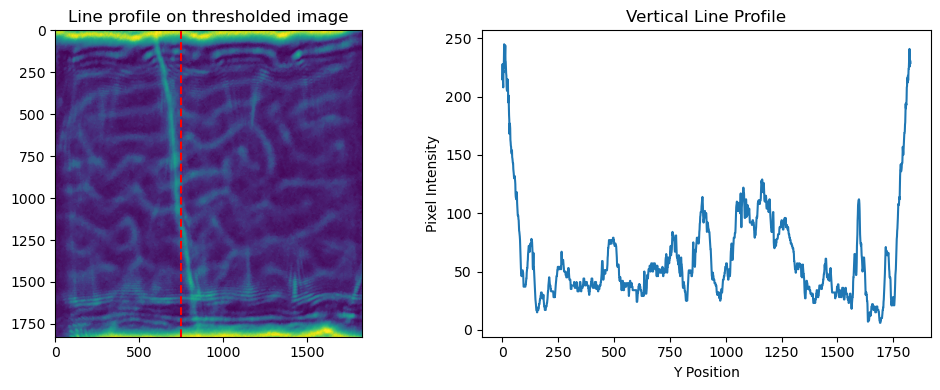

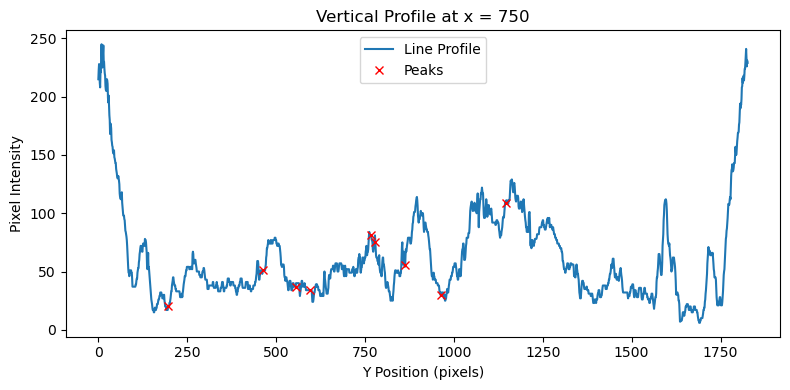

Number of peaks: 9
Average peak-to-peak spacing: 118.88 pixels


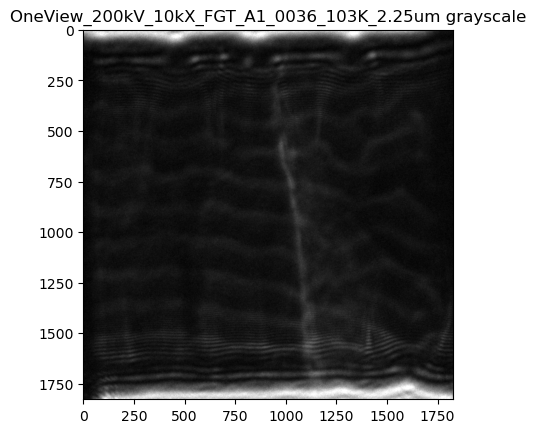

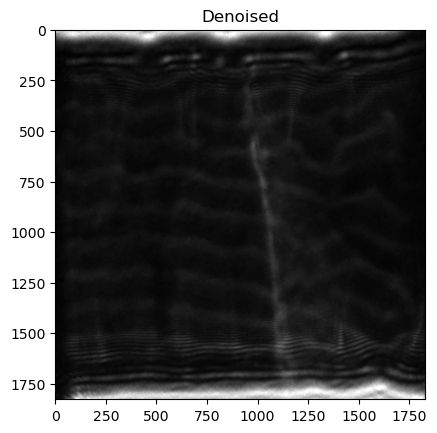

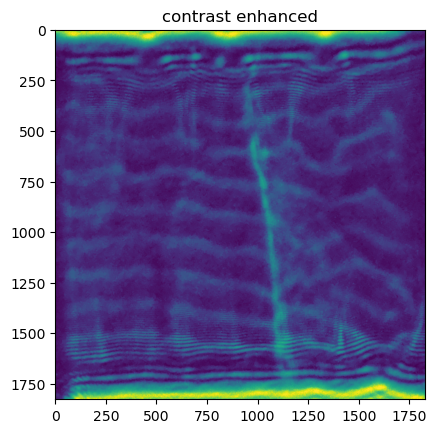

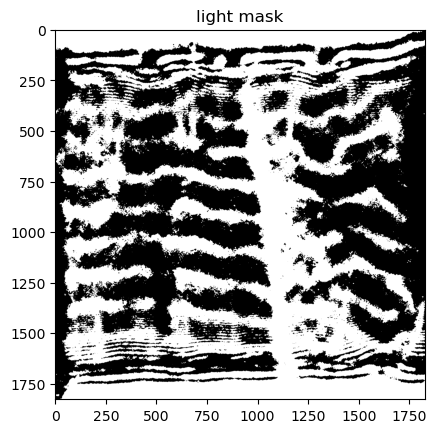

(1827, 1827)
light_pixels 1704370
total_pixels 3337929
dark_pixels 1633559
ratio 0.5106070260931254
OneView_200kV_10kX_FGT_A1_0036_103K_2.25um.png ratio of light pixels to total pixels:  0.5106070260931254


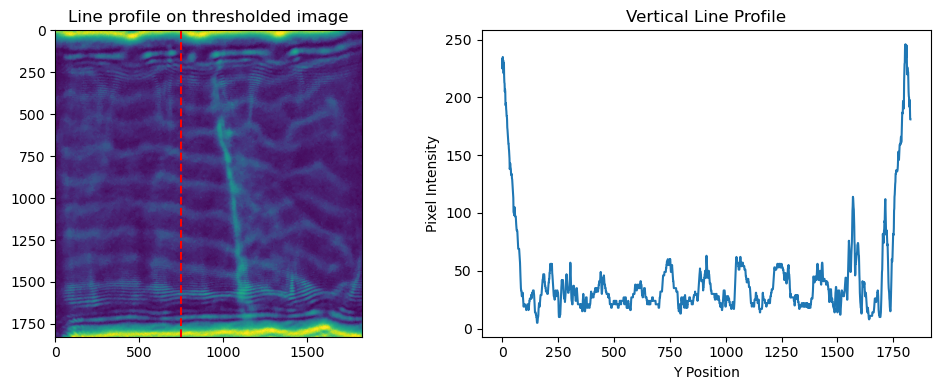

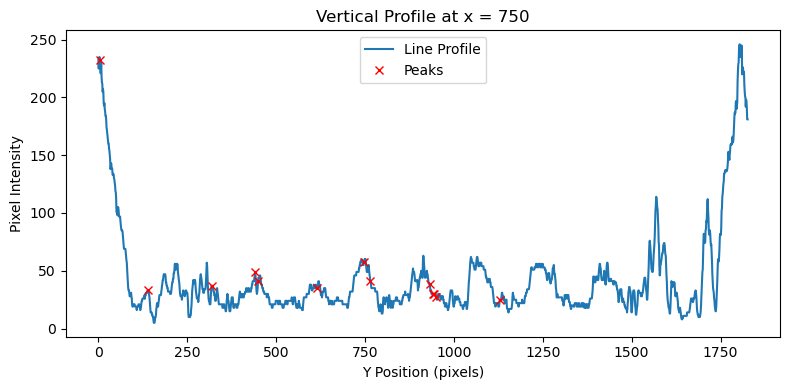

Number of peaks: 13
Average peak-to-peak spacing: 93.83 pixels


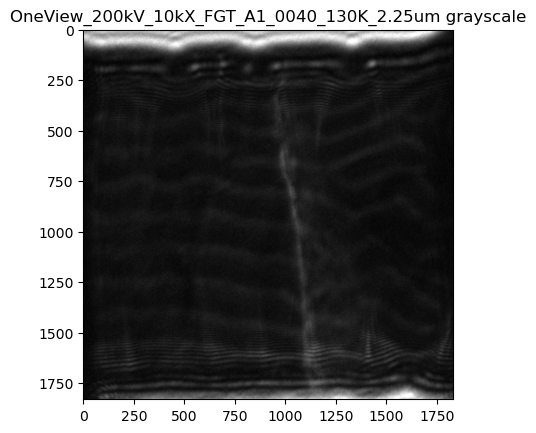

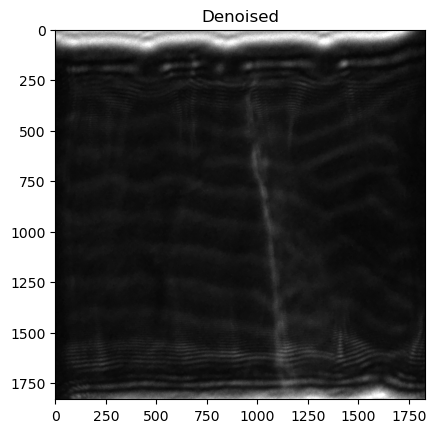

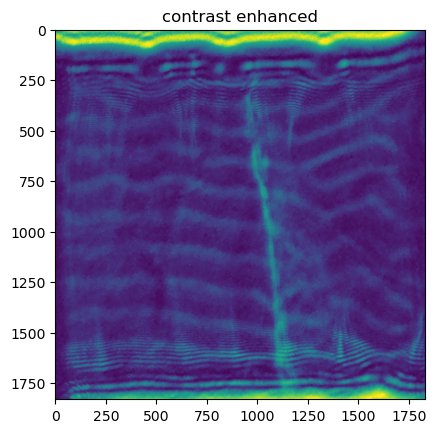

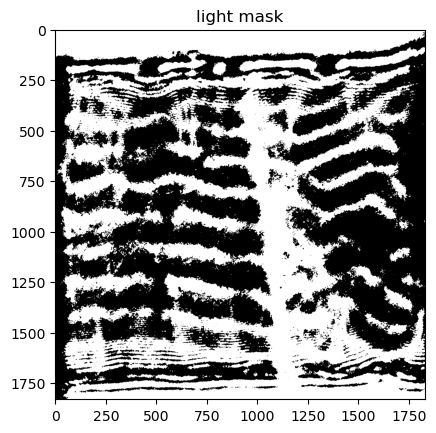

(1830, 1830)
light_pixels 1674219
total_pixels 3348900
dark_pixels 1674681
ratio 0.49993102212666846
OneView_200kV_10kX_FGT_A1_0040_130K_2.25um.png ratio of light pixels to total pixels:  0.49993102212666846


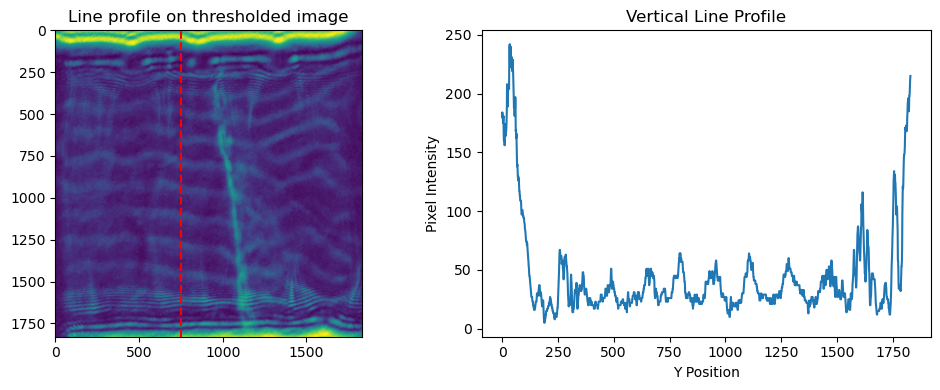

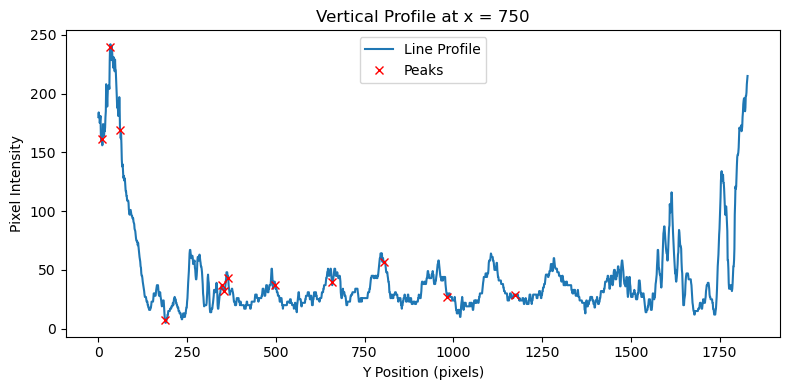

Number of peaks: 12
Average peak-to-peak spacing: 106.00 pixels


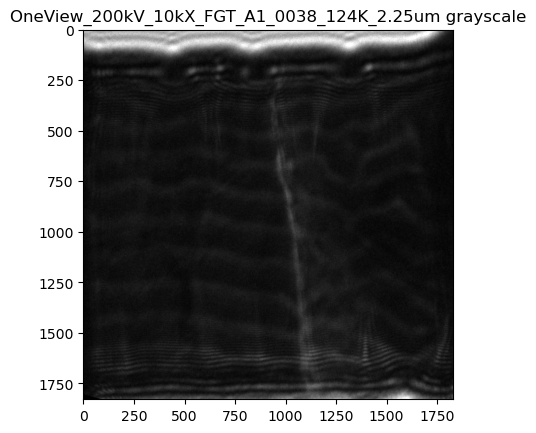

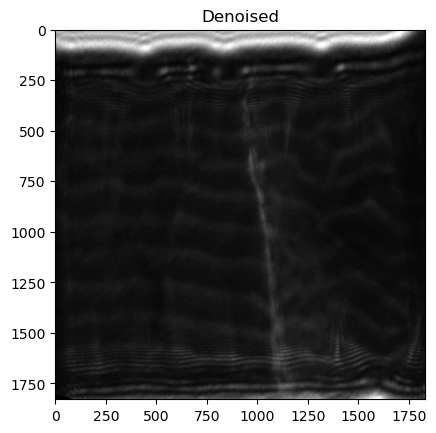

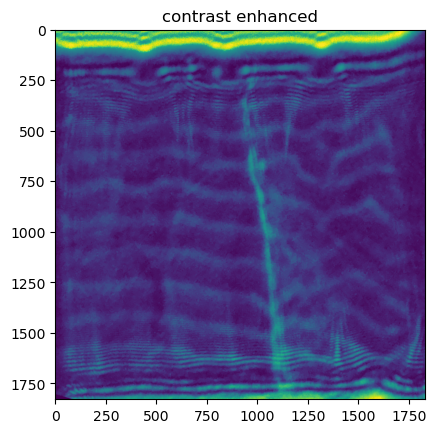

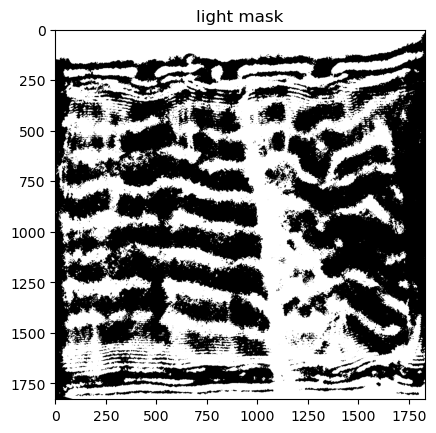

(1829, 1829)
light_pixels 1668849
total_pixels 3345241
dark_pixels 1676392
ratio 0.4988725774914274
OneView_200kV_10kX_FGT_A1_0038_124K_2.25um.png ratio of light pixels to total pixels:  0.4988725774914274


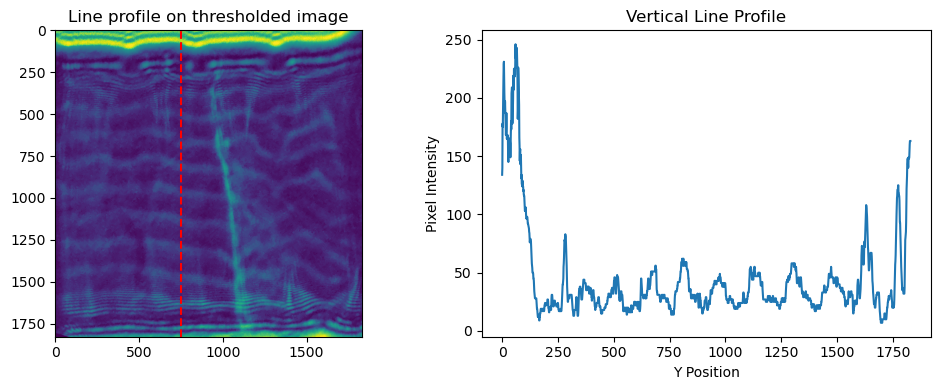

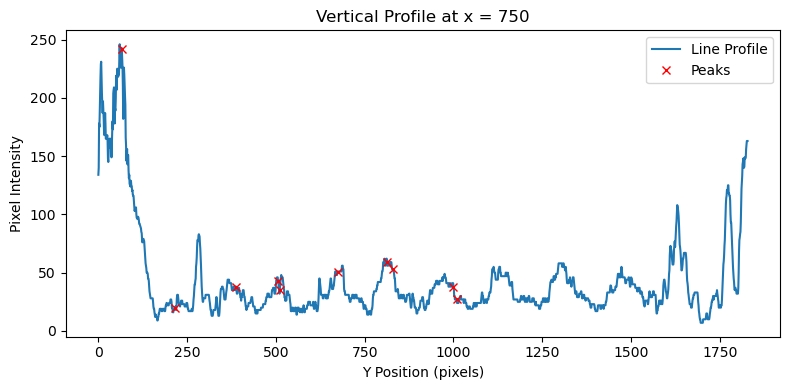

Number of peaks: 10
Average peak-to-peak spacing: 104.78 pixels


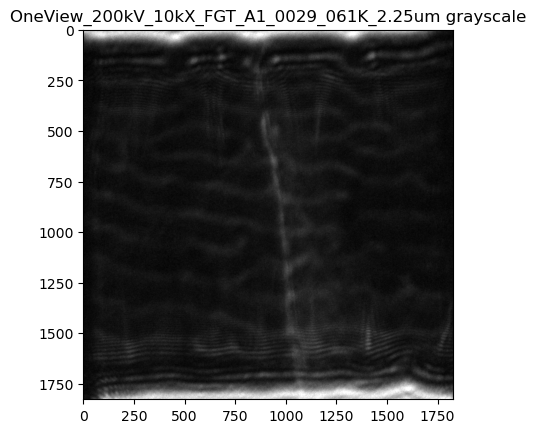

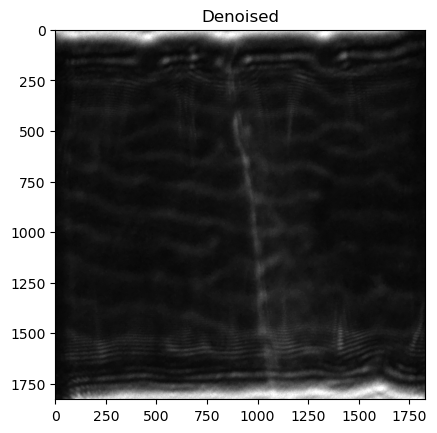

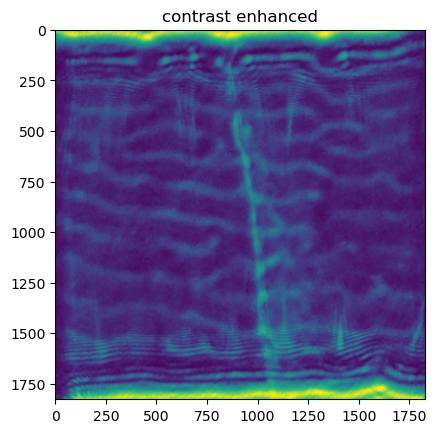

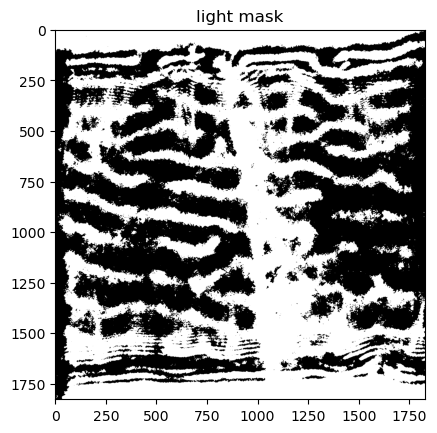

(1827, 1827)
light_pixels 1726011
total_pixels 3337929
dark_pixels 1611918
ratio 0.5170903874827775
OneView_200kV_10kX_FGT_A1_0029_061K_2.25um.png ratio of light pixels to total pixels:  0.5170903874827775


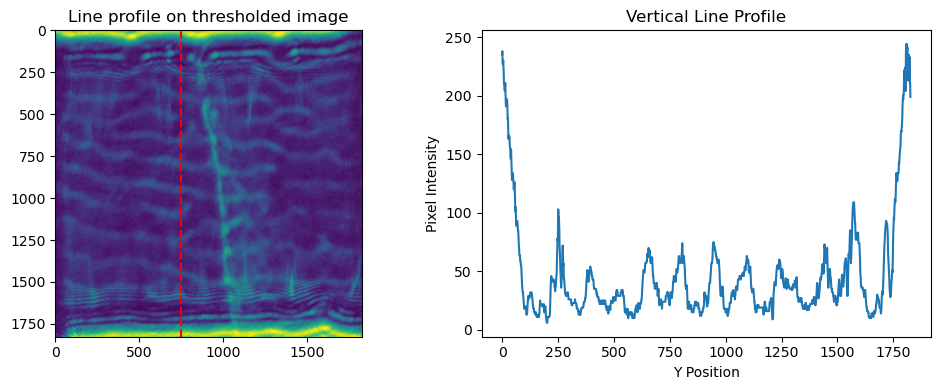

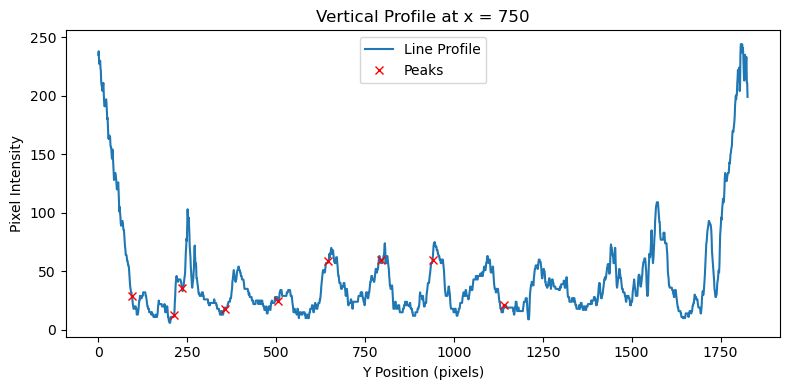

Number of peaks: 9
Average peak-to-peak spacing: 131.00 pixels


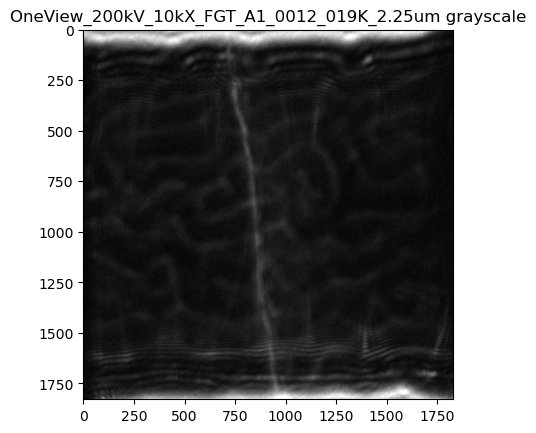

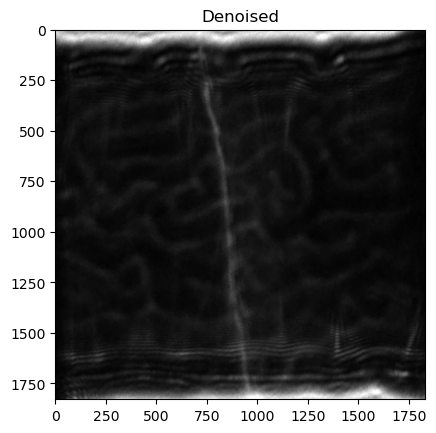

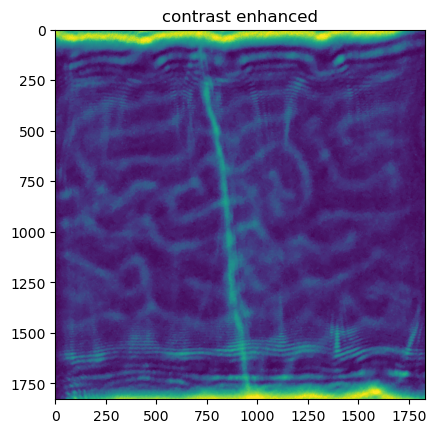

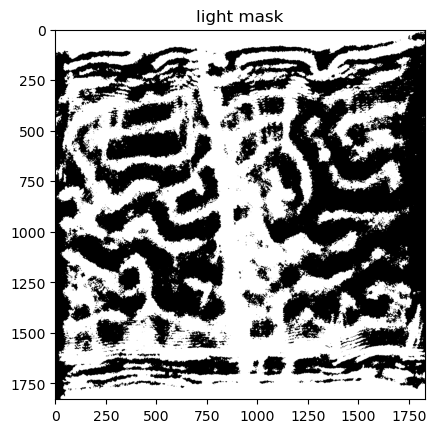

(1829, 1829)
light_pixels 1758642
total_pixels 3345241
dark_pixels 1586599
ratio 0.5257145897709612
OneView_200kV_10kX_FGT_A1_0012_019K_2.25um.png ratio of light pixels to total pixels:  0.5257145897709612


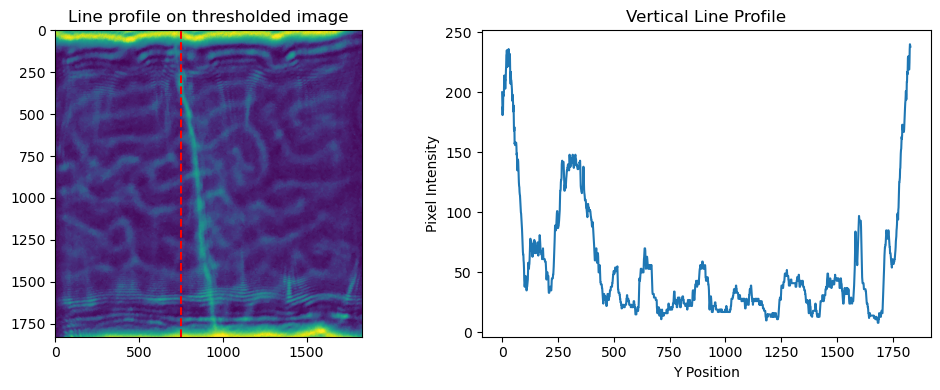

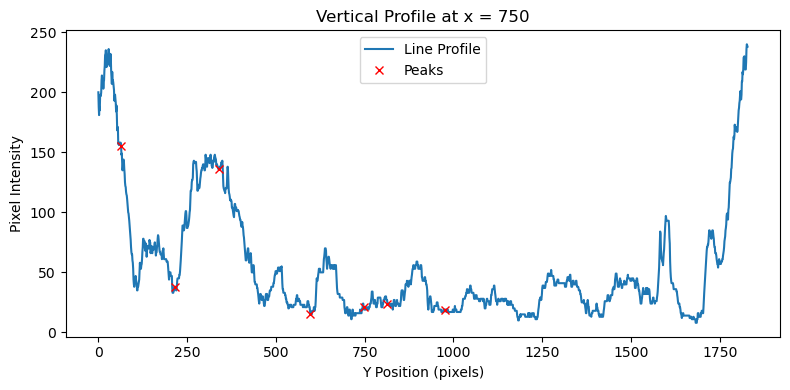

Number of peaks: 7
Average peak-to-peak spacing: 151.83 pixels


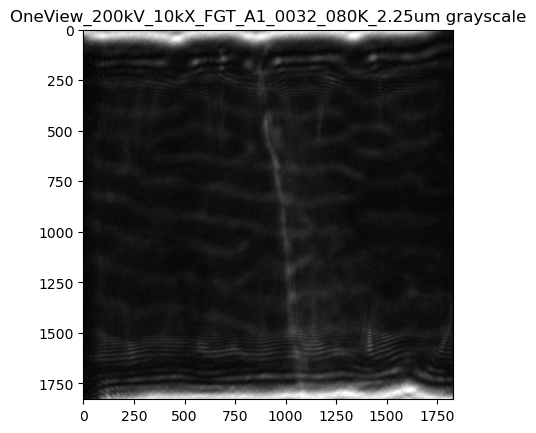

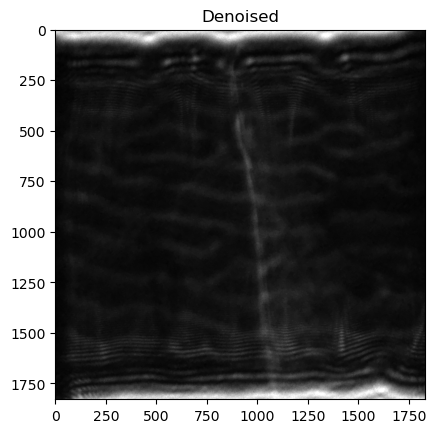

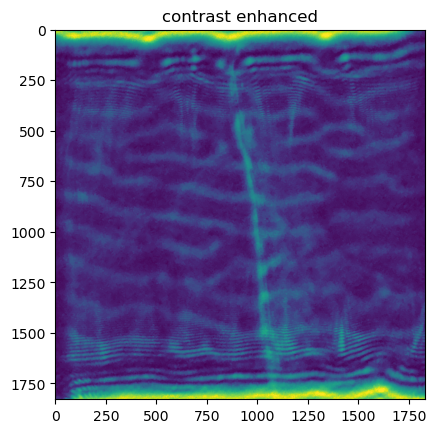

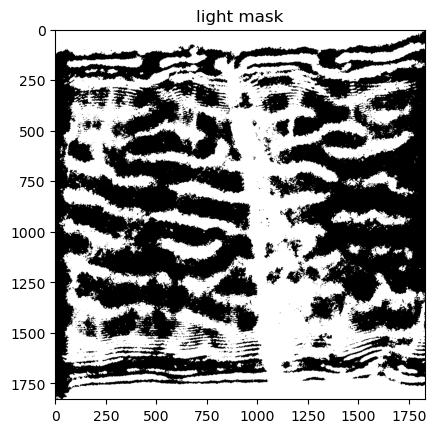

(1829, 1829)
light_pixels 1710707
total_pixels 3345241
dark_pixels 1634534
ratio 0.5113852783700785
OneView_200kV_10kX_FGT_A1_0032_080K_2.25um.png ratio of light pixels to total pixels:  0.5113852783700785


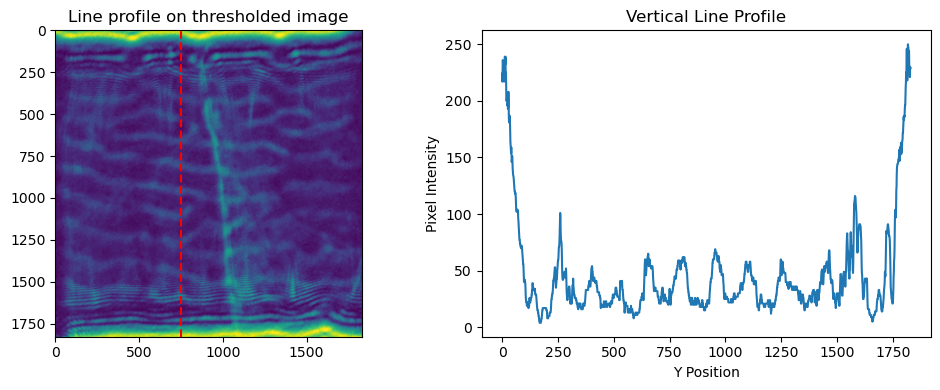

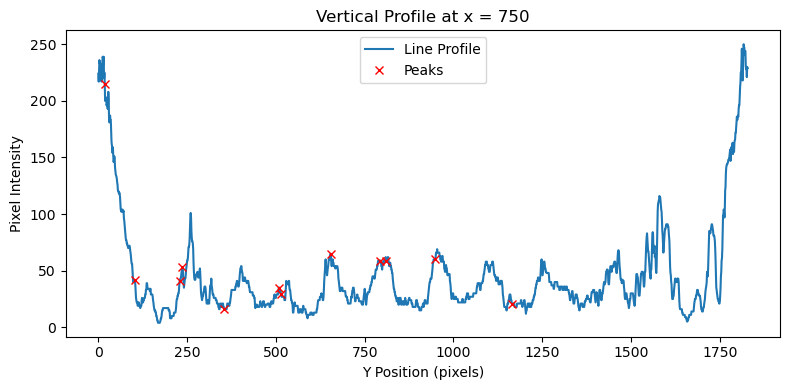

Number of peaks: 12
Average peak-to-peak spacing: 104.18 pixels


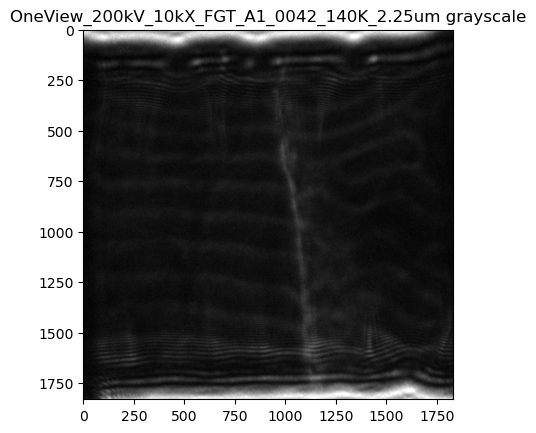

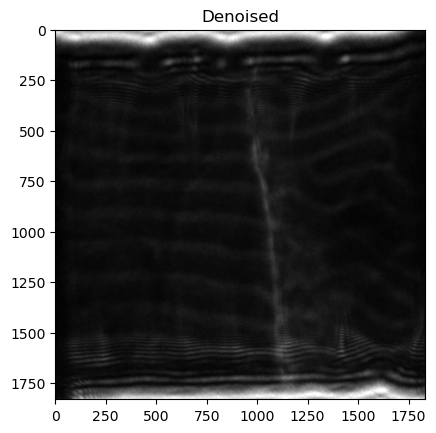

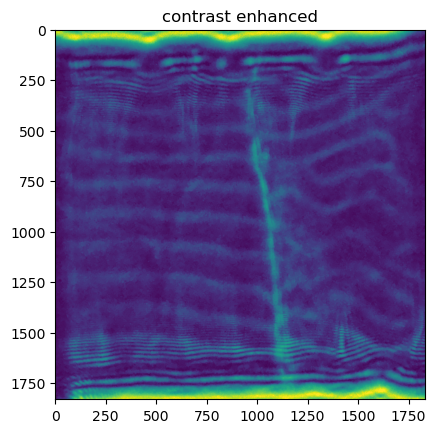

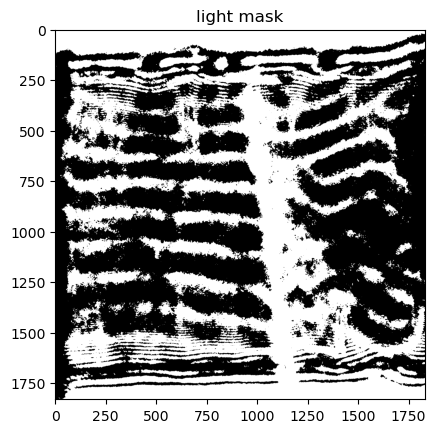

(1831, 1831)
light_pixels 1587615
total_pixels 3352561
dark_pixels 1764946
ratio 0.4735529047793612
OneView_200kV_10kX_FGT_A1_0042_140K_2.25um.png ratio of light pixels to total pixels:  0.4735529047793612


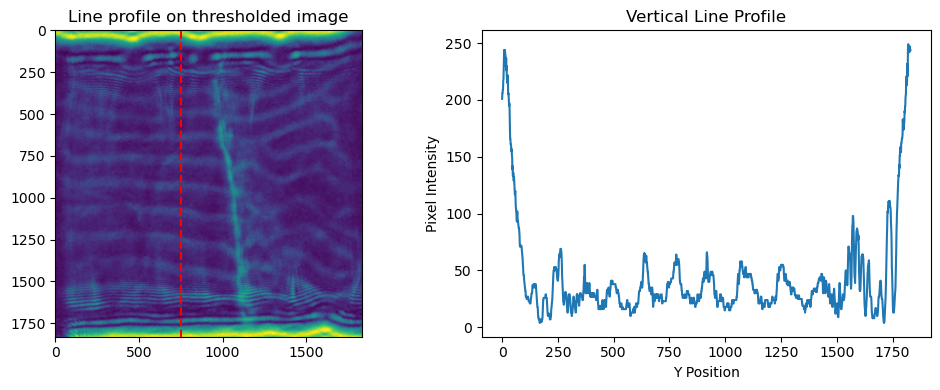

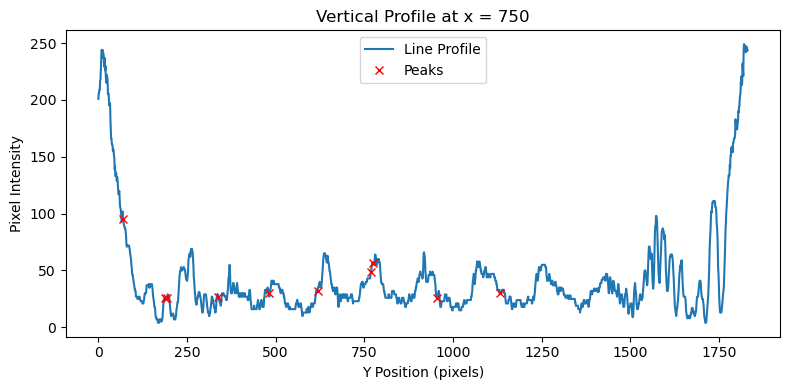

Number of peaks: 10
Average peak-to-peak spacing: 118.00 pixels


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import csv
import re
from scipy.signal import find_peaks

# Load the image
current_path = os.getcwd()
folder_name= '6000OLF_MedRibbon_2mmDefocus_20DegTilt_Rotated15Deg'
DATA_PATH = os.path.join(current_path, 'images', folder_name) #path to where the data is saved


#image preprocessing: denoise and contrast enhance
def preprocess_images(image, image_filename): 
    #denoise image to speed up processing time: #seems to make image quality worse! 
    image_denoised = cv2.fastNlMeansDenoising(image, None, 3, 7, 21)
    # image_denoised = image

    
    #plot: 
    plt.imshow(image_denoised, cmap='gray')
    plt.title('Denoised')
    plt.show()

    #enhance the contrast: 
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(image_denoised)
    plt.imshow(contrast_enhanced)
    plt.title('contrast enhanced')
    plt.show()
    
    return contrast_enhanced

#do the binary thresholding for processing:
def thresholding(image,image_filename):
     # Threshold to detect light lines: higher threshold for bright features
    _, light_mask = cv2.threshold(image, 35, 255, cv2.THRESH_BINARY) #first number is threshold, second number is what it converts pixels to 
    #plot: 
    plt.imshow(light_mask, cmap='gray')
    plt.title('light mask')
    plt.show()
    
    
    #result is either light_mask or light_edges, depending on what you want to do: 
    result= light_mask
    
    # Save the result
    output_path = os.path.join(DATA_PATH, 'processed')
    output_filename = os.path.join(output_path, image_filename.replace('.png','_thresholded.png'))
    cv2.imwrite(output_filename, result)
    return result

#light pixel ratio of each file (light pixels/ total pixels)
def image_lightdark_ratio(image, image_filename):
    light_pixels = cv2.countNonZero(image)
    print(image.shape)
    print('light_pixels', light_pixels)
    height, width = image.shape
    total_pixels = height*width
    print('total_pixels', total_pixels)
    dark_pixels = total_pixels-light_pixels
    print('dark_pixels', dark_pixels)
    ratio_light_to_total= light_pixels/total_pixels
    print('ratio', ratio_light_to_total)
    
    return ratio_light_to_total

#extract line profile, plot, and find peaks
def line_profile_func(image, x_value):
    #from chat GPT

    # --- Extract the vertical line profile ---
    line_profile = image[:, x_value]

    # --- Plot the image and overlay the vertical line ---
    plt.figure(figsize=(10, 4))
    
    # Image with vertical line: place line where the line profile will be extracted from
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axvline(x=x_value, color='red', linestyle='--')
    plt.title('Line profile on thresholded image')

    # plot line profile
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(line_profile)), line_profile)
    plt.title('Vertical Line Profile')
    plt.xlabel('Y Position')
    plt.ylabel('Pixel Intensity')
    plt.tight_layout()
    plt.show()
    
    # --- Detect peaks ---
    # You can adjust `distance` or `prominence` as needed
    peaks, _ = find_peaks(line_profile[300:1500], prominence=20, distance=5)

    # --- Calculate peak-to-peak spacing ---
    if len(peaks) > 1:
        spacings = np.diff(peaks)  # difference between consecutive peaks (in pixels)
        avg_spacing = np.mean(spacings)
    else:
        spacings = []
        avg_spacing = None

    # --- Plot ---
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(len(line_profile)), line_profile, label='Line Profile')
    plt.plot(peaks, line_profile[peaks], "rx", label='Peaks')
    plt.xlabel("Y Position (pixels)")
    plt.ylabel("Pixel Intensity")
    plt.title(f'Vertical Profile at x = {x_value}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Print results ---
    print(f"Number of peaks: {len(peaks)}")
    if avg_spacing is not None:
        print(f"Average peak-to-peak spacing: {avg_spacing:.2f} pixels")
    else:
        print("Not enough peaks to calculate spacing.")
        return 
    
#get temperature from filename (from ChatGPT): 
def extract_temperature(filename):
    # Use a regular expression to match the pattern 'xxxK' preceded by an underscore
    match = re.search(r'_(\d{3,})K', filename)
    
    # If a match is found, return the matched temperature
    if match:
        temp_str = match.group(1)  # Get the temperature as string (e.g., '017')
        return str(int(temp_str))  # Convert to int and back to string to remove leading zeroes
    else:
        raise ValueError("Temperature not found in filename")

#loop through everything in folder and do all images at once
file_stats=[] #to be written to the csv file
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".png"): #don't include txt files or folders
        #load the image:
        image_path = os.path.join(DATA_PATH, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # load image, convert to grayscale when loading
        #Display grayscale (unprocessed) image
        plt.imshow(image, cmap='gray')
        plt.title(filename.replace('.png', ' ')+'grayscale')
        plt.show() 
        #preprocess image:
        temperature= extract_temperature(filename)
        preprocessed_image = preprocess_images(image, filename)
        thresholded_image= thresholding(preprocessed_image, filename)
        #get light to dark ratio: 
        image_ratio=image_lightdark_ratio(thresholded_image, filename)
        file_stats.append([filename, round(image_ratio,3), temperature])
        print(filename, 'ratio of light pixels to total pixels: ', image_ratio)
        #line profile
        line_profile_func(preprocessed_image, 750)


#export as csv file with the light dark ratios: 
csv_filename= 'data_summary.csv'
csv_path=  output_path = os.path.join(DATA_PATH, 'processed',csv_filename)#csv filepath


with open(csv_path, 'w', newline='') as csvfile: 
    #write header
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['File name', 'Temperature (K)','Light pixel to total pixel ratio'])
    for name, ratio, temperature in file_stats: 
        csvwriter.writerow([name, temperature, ratio])
        
